In [6]:
df = read.csv2("../dataset2/dataset_completo.csv", header=T,sep = ",")

In [7]:
str(df)

'data.frame':	14596 obs. of  24 variables:
 $ Halstead_b        : Factor w/ 329 levels "0.0","0.01","0.02",..: 131 101 11 8 13 13 2 4 19 46 ...
 $ Halstead_d        : Factor w/ 3038 levels "0.0","0.5","0.63",..: 7 5 2981 540 634 634 834 2610 391 1047 ...
 $ Halstead_e        : Factor w/ 8849 levels "0.0","1.0","1.3",..: 3 2 4178 4818 6926 6926 7459 6951 7911 4317 ...
 $ Halstead_i        : Factor w/ 4973 levels "0.0","1.0","1.3",..: 3 2 2312 452 1150 1150 889 585 2774 4076 ...
 $ Halstead_l        : Factor w/ 61 levels "0.0","0.01","0.02",..: 58 57 12 7 7 7 50 17 8 5 ...
 $ Halstead_lOBlank  : int  2 1 6 3 3 3 1 7 13 22 ...
 $ Halstead_lOCode   : int  2 1 1 0 0 0 0 0 12 8 ...
 $ Halstead_lOComment: int  2 1 0 0 0 0 0 0 16 35 ...
 $ Halstead_n        : Factor w/ 852 levels "0.0","1.0","1.3",..: 3 2 676 541 734 734 38 263 27 275 ...
 $ Halstead_t        : Factor w/ 8509 levels "0.0","0.06","0.13",..: 20 16 1818 2440 4459 4459 4040 4420 5408 1944 ...
 $ Halstead_v        : Factor w/ 4647 

In [8]:
library(C50)
df[,'defects'] <- as.factor(df[,'defects'])
output <- df[["defects"]]
df$defects <- NULL
input <- df

In [9]:
str(input)

'data.frame':	14596 obs. of  23 variables:
 $ Halstead_b        : Factor w/ 329 levels "0.0","0.01","0.02",..: 131 101 11 8 13 13 2 4 19 46 ...
 $ Halstead_d        : Factor w/ 3038 levels "0.0","0.5","0.63",..: 7 5 2981 540 634 634 834 2610 391 1047 ...
 $ Halstead_e        : Factor w/ 8849 levels "0.0","1.0","1.3",..: 3 2 4178 4818 6926 6926 7459 6951 7911 4317 ...
 $ Halstead_i        : Factor w/ 4973 levels "0.0","1.0","1.3",..: 3 2 2312 452 1150 1150 889 585 2774 4076 ...
 $ Halstead_l        : Factor w/ 61 levels "0.0","0.01","0.02",..: 58 57 12 7 7 7 50 17 8 5 ...
 $ Halstead_lOBlank  : int  2 1 6 3 3 3 1 7 13 22 ...
 $ Halstead_lOCode   : int  2 1 1 0 0 0 0 0 12 8 ...
 $ Halstead_lOComment: int  2 1 0 0 0 0 0 0 16 35 ...
 $ Halstead_n        : Factor w/ 852 levels "0.0","1.0","1.3",..: 3 2 676 541 734 734 38 263 27 275 ...
 $ Halstead_t        : Factor w/ 8509 levels "0.0","0.06","0.13",..: 20 16 1818 2440 4459 4459 4040 4420 5408 1944 ...
 $ Halstead_v        : Factor w/ 4647 

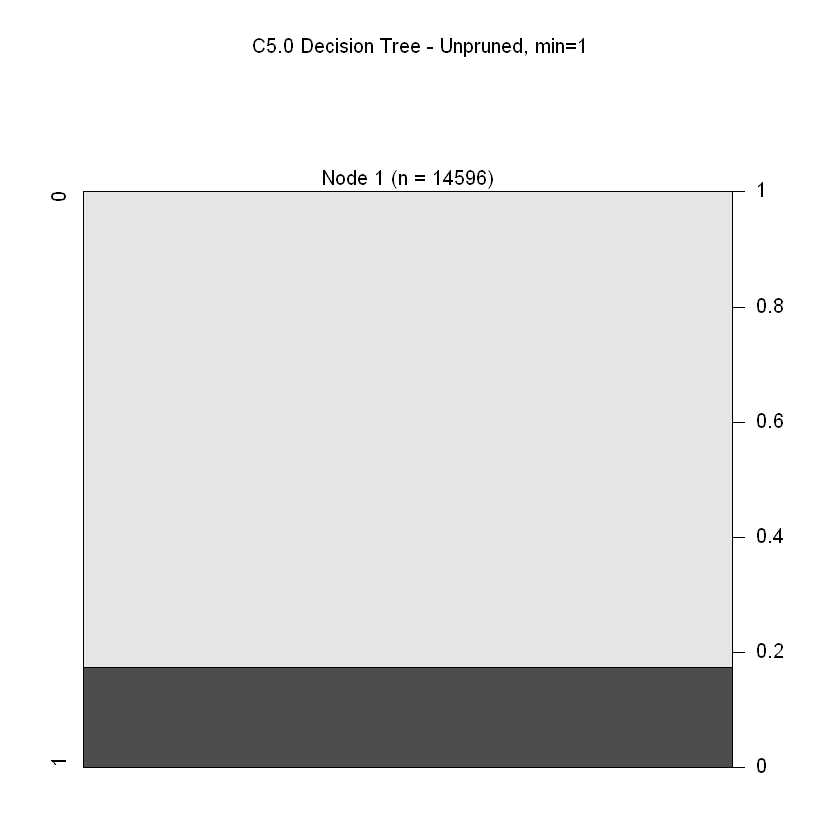

In [13]:
model1 <- C5.0(input, output, control = C5.0Control(noGlobalPruning = TRUE,minCases=1,trials=2))
plot(model1, main="C5.0 Decision Tree - Unpruned, min=1")

In [ ]:
## ----IntroML-DecTree-Iris-class1res, fig.width=10, fig.height=8----------
library(ggplot2)
ggplot(iris,aes(x=Petal.Length,y=Petal.Width))+
  geom_point(aes(colour = factor(Species)))+
  # Petal.Length = 1.9 
  geom_segment(aes(x=1.9,y=min(iris$Petal.Width),xend=1.9,yend=max(iris$Petal.Width)))+ 
  # Petal.Width = 1.7
  geom_segment(aes(x=1.9,y=1.7,xend=max(iris$Petal.Length),yend=1.7))+ 
  # Petal.Length = 4.9
  geom_segment(aes(x=4.9,y=1.7,xend=4.9,yend=min(iris$Petal.Width)))+ 
  # Petal.Width = 1.5
  geom_segment(aes(x=4.9,y=1.5,xend=max(iris$Petal.Length),yend=1.5))+
  # Petal.Length = 5.4
  geom_segment(aes(x=5.4,y=1.5,xend=5.4,yend=min(iris$Petal.Width)))+ 
  ggtitle("Petal Length x Petal Width")



In [ ]:

## ----IntroML-DecTree-Iris-class1a----------------------------------------
summary(model1)
C5imp(model1,metric='usage')


In [ ]:
## ----IntroML-DecTree-Iris-predict----------------------------------------
newcases <- df[c(1:3,51:53,101:103),]
newcases
predicted <- predict(model1, newcases, type="class")
predicted




In [ ]:
## ----IntroML-DecTree-Iris-class2, fig.width=10, fig.height=8-------------
model2 <- C5.0(input, output, control = C5.0Control(noGlobalPruning = FALSE,minCases=1))
plot(model2, main="C5.0 Decision Tree - Pruned, min=1")
model2



In [ ]:

## ----IntroML-DecTree-Iris-class3, fig.width=10, fig.height=8-------------
model3 <- C5.0(input, output, control = C5.0Control(noGlobalPruning = FALSE,minCases=500))
plot(model3, main="C5.0 Decision Tree - Pruned, min=5")